# Visualization utilities

## 1. Visualizing a grid of images

Sử dụng hàm `make_grid()` của `torchvision.utils`

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


import torchvision.transforms.functional as F

plt.rcParams['savefig.bbox'] = 'tight'

def show(imgs):
    # Check if imgs is 'list' type
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        

torch.Size([3, 309, 307])


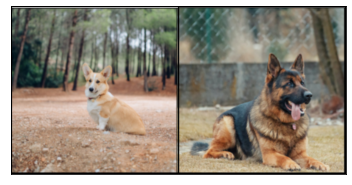

In [12]:
from torchvision.utils import make_grid
from torchvision.io import read_image,ImageReadMode
from pathlib import Path

dog1_int = read_image(str(Path('../../images') / 'dog1.png'), mode=ImageReadMode.RGB)
dog2_int = read_image(str(Path('../../images') / 'dog2.png'), mode=ImageReadMode.RGB)
print(dog1_int.shape)
dog_list = [F.resize(img=img, size=(307, 307)) for img in[dog1_int, dog2_int]]

grid = make_grid(dog_list)
show(grid)

## 2. Visualizing bounding boxes

Sử dụng `draw_bounding_boxes()` để vẽ bounding boxes lên ảnh, có thể set colors, labels, widths, font và font size cho box. Các boxes cho ở định dạng là `[xmin, ymin, xmax, ymax]`

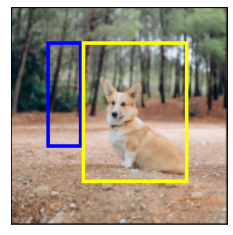

In [23]:
from torchvision.utils import draw_bounding_boxes

boxes = torch.tensor([[50, 50, 100, 200], [100, 50, 250, 250]], dtype=torch.float)
colors=["blue", "yellow"]
result = draw_bounding_boxes(dog1_int, boxes, colors=colors, width = 5)
show(result)

### Example to auto object detection with `Faster R-CNN` model loaded from `fasterrcnn_resnet50_fpn()`. Xem thêm tại [Instance segmentation models](https://pytorch.org/vision/stable/auto_examples/plot_visualization_utils.html#instance-seg-output)

In [24]:
from matplotlib import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

images = [transforms(d) for d in dog_list]

model = fasterrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

outputs = model(images)
print(outputs)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\pC/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


[{'boxes': tensor([[130.3390, 103.8239, 247.2619, 234.4146],
        [209.6217, 105.6229, 217.9919, 137.2699],
        [ 93.3236, 122.6977, 101.9222, 156.2978]], grad_fn=<StackBackward0>), 'labels': tensor([18,  1,  1]), 'scores': tensor([0.9995, 0.1428, 0.0592], grad_fn=<IndexBackward0>)}, {'boxes': tensor([[ 37.0466,  80.0231, 271.3451, 305.3114],
        [ 35.3252, 131.8269, 189.3151, 289.6032],
        [154.0495,  76.3245, 288.4458, 300.6487],
        [  3.7526,  95.1872, 181.3786, 256.0595],
        [ 19.5531,  86.3973, 279.8584, 294.5604]], grad_fn=<StackBackward0>), 'labels': tensor([18, 18, 18, 15, 19]), 'scores': tensor([0.9961, 0.1334, 0.1301, 0.1093, 0.0865], grad_fn=<IndexBackward0>)}]


#### Draw boxes that receive from model

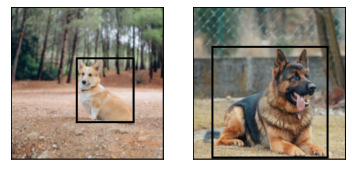

In [29]:
score_threshold = 0.8
dogs_with_boxes = [
    draw_bounding_boxes(dog_int, boxes=output['boxes'][output['scores'] > score_threshold], width=4)
    for dog_int, output in zip(dog_list, outputs)
]
show(dogs_with_boxes)

## 3. Visualizing segmentation masks

hàm `draw_segmentation_masks()` function dùng để draw segmentation masks vào images. `Semantic segmentation` và `instance segmentation` models.

### a) Semantic segmentation models

Sử dụng torchvision's FCN Resnet-50, loaded với `fcn_resnet50()`.

In [33]:

from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights

weights = FCN_ResNet50_Weights.DEFAULT
print(weights.meta)
transforms = weights.transforms(resize_size=None)

model = fcn_resnet50(weights=weights, progress=False)
model = model.eval()

batch = torch.stack([transforms(d) for d in dog_list])
output = model(batch)['out']
print(output.shape, output.min().item(), output.max().item())

{'categories': ['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'], 'min_size': (1, 1), '_docs': '\n        These weights were trained on a subset of COCO, using only the 20 categories that are present in the Pascal VOC\n        dataset.\n    ', 'num_params': 35322218, 'recipe': 'https://github.com/pytorch/vision/tree/main/references/segmentation#fcn_resnet50', '_metrics': {'COCO-val2017-VOC-labels': {'miou': 60.5, 'pixel_acc': 91.4}}}
torch.Size([2, 21, 307, 307]) -6.07082462310791 13.888558387756348
